# Exploratory Data Analysis-II 

## Task 
- Finding the Length of each Sequence and Creating a Length Column 
- Calculating GC Ratio and Creating GC Column 
- Finding the % of N and Creating % of N Column
- Per Base Sequence Content
 
## Basic Questions 
- Maximum and minimum sequence length?
- Returns the maximum and minimum Length with their index. 
- Maximum and minimum sequence GC Ratio?
- Returns the maximum and minimum GC Ratio with their index. 
- GC distributions. 
- No. of Gen and bar plot 

In [2]:
# library 
import numpy as np # for linear algebra 
import pandas as pd # for data mangement 
import matplotlib.pyplot as plt # for data visualizations
import seaborn as sns # advance visualizations 

# set figure styles 
plt.rcParams['figure.figsize'] =(10,8)
plt.rcParams['font.size'] = 14
sns.set_style('whitegrid')

# dask 
import dask.array as da # faster numpy calculations 
import dask.dataframe as dd # for faster data management

## Reading and Exploring Data 

In [3]:
# read data 
df = pd.read_csv('./data/2 Id Desc Gen Seq.csv')

In [4]:
# examine first few rows 
df.head() 

,Id,Des,Gen,Seq
0,KY465671.1,"Sacbrood virus strain WA2 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTATTTCGCCTGAGTAAATCGAGAT...
1,KY465672.1,"Sacbrood virus strain WA1 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...
2,KY465673.1,"Sacbrood virus strain VN3 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...
3,KY465674.1,"Sacbrood virus strain VN2 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...
4,KY465675.1,"Sacbrood virus strain VN1 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...


In [5]:
# columns names 
df.columns 

Index(['Id', 'Des', 'Gen', 'Seq'], dtype='object')

In [6]:
# observations X columns 
df.shape

(43090, 4)

In [7]:
# basic info 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43090 entries, 0 to 43089
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      43090 non-null  object
 1   Des     43090 non-null  object
 2   Gen     43090 non-null  object
 3   Seq     43090 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB


In [8]:
# set index as Id 
df = df.set_index('Id')
df.head() 

,Des,Gen,Seq
Id,,,
KY465671.1,"Sacbrood virus strain WA2 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTATTTCGCCTGAGTAAATCGAGAT...
KY465672.1,"Sacbrood virus strain WA1 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...
KY465673.1,"Sacbrood virus strain VN3 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...
KY465674.1,"Sacbrood virus strain VN2 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...
KY465675.1,"Sacbrood virus strain VN1 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...


## Missing Values 

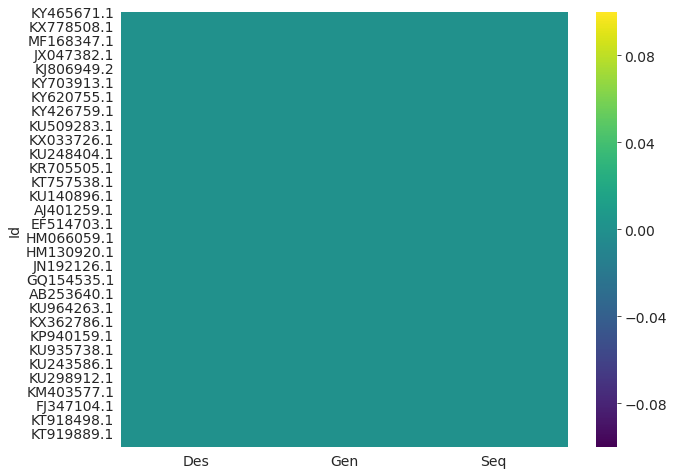

In [9]:
# missing values 
sns.heatmap(df.isnull(), cmap='viridis');

## Data Cleaning 

In [10]:
# replace newline or tab character with empty space
df.Seq.str.replace("\n", "")
df.Seq.str.replace("\t", "")

Id
KY465671.1    TACGAATCGTGATTCGATTCATTATTTCGCCTGAGTAAATCGAGAT...
KY465672.1    TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...
KY465673.1    TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...
KY465674.1    TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...
KY465675.1    TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...
                                    ...                        
KR054750.1    TAATGACAGGGCTCAAGGAAGTGCTGCAAAATTTCAGCAAAAACCA...
KT220420.1    ACCAGCGCACTTCGGCAGCGGCAGCACCTCGGCAGCACCTCAGCAG...
KT272765.1    ACCGGATGCCCGCGGAGCCAAAAAGTGACCCCACAGGACACGTGCA...
KT272766.1    ACCGGATGGCCGCCGGATCCCATTTGTGCGGACCCCACAGAGTCTC...
KT272767.1    ACCGGATGCCCGCGGAGCCAAAAAGTGACCCCACAGGACACGTGCA...
Name: Seq, Length: 43090, dtype: object

In [11]:
# check length of first seq 
len(df.Seq.iloc[0]) 

8832

## Task #1: Finding the Length of each Sequences and Creating a Length Column 

In [12]:
# find the length 
L = lambda seq: len(seq)
# test
L('TGGATTTGTTAGTGATACGAATCGCTTTATAATCATATGTTTCTC')

45

In [13]:
# seqLen apply 
df['Len'] = df['Seq'].apply(lambda seq: len(seq))

In [14]:
df.head(10)

,Des,Gen,Seq,Len
Id,,,,
KY465671.1,"Sacbrood virus strain WA2 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTATTTCGCCTGAGTAAATCGAGAT...,8832
KY465672.1,"Sacbrood virus strain WA1 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8832
KY465673.1,"Sacbrood virus strain VN3 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8820
KY465674.1,"Sacbrood virus strain VN2 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8832
KY465675.1,"Sacbrood virus strain VN1 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8835
KY465676.1,"Sacbrood virus strain TAS polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTATTTCGCCTGAGTAAATCGAGAT...,8835
KY465677.1,"Sacbrood virus strain SA polyprotein gene, com...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8823
KY465678.1,"Sacbrood virus strain QLD polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8835
KY465679.1,"Sacbrood virus strain NT polyprotein gene, com...",ssRNA(+),TACGAATCGTGATTCGATTCATTATTTCGCCTGAGTAAATCGAGAT...,8830


## Task #2: Calculating GC Ratio and Creating GC Column

### GC Usefulness 
- GC-content (or guanine-cytosine content) is the percentage of nitrogenous bases in a DNA or RNA molecule that are either guanine (G) or cytosine (C)
- In polymerase chain reaction (PCR) experiments, the GC-content of short oligonucleotides known as primers is often used to predict their annealing temperature to the template DNA.
- A higher GC-content level indicates a relatively higher melting temperature.
- DNA with low GC-content is less stable than DNA with high GC-content

In [15]:
def calculateGC(seq): 
    """Returns GC Ratio of a sequence"""
    return round((seq.count('G') + seq.count('C'))/len(seq) * 100, 2) 

In [16]:
# test fun
calculateGC('TGGATTTGTTAGTGATACGAATCGCTTTATAATCATATGTTTCTCT')

30.43

In [17]:
# calculateGC apply
df['GC'] = df['Seq'].apply(calculateGC)

In [18]:
df.head(10)

,Des,Gen,Seq,Len,GC
Id,,,,,
KY465671.1,"Sacbrood virus strain WA2 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTATTTCGCCTGAGTAAATCGAGAT...,8832,40.99
KY465672.1,"Sacbrood virus strain WA1 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8832,41.01
KY465673.1,"Sacbrood virus strain VN3 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8820,40.92
KY465674.1,"Sacbrood virus strain VN2 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8832,40.87
KY465675.1,"Sacbrood virus strain VN1 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8835,41.02
KY465676.1,"Sacbrood virus strain TAS polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTATTTCGCCTGAGTAAATCGAGAT...,8835,40.84
KY465677.1,"Sacbrood virus strain SA polyprotein gene, com...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8823,40.78
KY465678.1,"Sacbrood virus strain QLD polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8835,40.84
KY465679.1,"Sacbrood virus strain NT polyprotein gene, com...",ssRNA(+),TACGAATCGTGATTCGATTCATTATTTCGCCTGAGTAAATCGAGAT...,8830,40.53


## Task #3: Finding the % of N and Creating % of N Column
The bases marked by N could not be identified due to the low quality of the DNA sequence.

In [19]:
counts = lambda seq: round((seq.count('N') /len(seq)) * 100,2)
# test
counts('TGGATTTGTTAGTGATACGANATCGCTTTATAATCATNATGTTTNCTCN')

8.16

In [20]:
# create a column N 
df['%N'] = df['Seq'].apply(lambda seq: seq.count('N'))

In [21]:
df.head(10)

,Des,Gen,Seq,Len,GC,%N
Id,,,,,,
KY465671.1,"Sacbrood virus strain WA2 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTATTTCGCCTGAGTAAATCGAGAT...,8832,40.99,0
KY465672.1,"Sacbrood virus strain WA1 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8832,41.01,0
KY465673.1,"Sacbrood virus strain VN3 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8820,40.92,0
KY465674.1,"Sacbrood virus strain VN2 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8832,40.87,0
KY465675.1,"Sacbrood virus strain VN1 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8835,41.02,0
KY465676.1,"Sacbrood virus strain TAS polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTATTTCGCCTGAGTAAATCGAGAT...,8835,40.84,0
KY465677.1,"Sacbrood virus strain SA polyprotein gene, com...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8823,40.78,0
KY465678.1,"Sacbrood virus strain QLD polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8835,40.84,0
KY465679.1,"Sacbrood virus strain NT polyprotein gene, com...",ssRNA(+),TACGAATCGTGATTCGATTCATTATTTCGCCTGAGTAAATCGAGAT...,8830,40.53,0


## Task #4: Per Base Sequence Content

In [22]:
A = lambda seq: round((seq.count('A') /len(seq)) * 100,2)
# test
A('TGGATTTGTTAGTGATACGANATCGCTTTATAATCATNATGTTTNCTCN')

22.45

In [23]:
T = lambda seq: round((seq.count('T') /len(seq)) * 100,2)
# test
T('TGGATTTGTTAGTGATACGANATCGCTTTATAATCATNATGTTTNCTCN') 

40.82

In [24]:
G = lambda seq: round((seq.count('G') /len(seq)) * 100,2)
# test
G('TGGATTTGTTAGTGATACGANATCGCTTTATAATCATNATGTTTNCTCN') 

16.33

In [25]:
C = lambda seq: round((seq.count('C') /len(seq)) * 100,2)
# test
C('TGGATTTGTTAGTGATACGANATCGCTTTATAATCATNATGTTTNCTCN') 

12.24

In [26]:
# create a column N 
df['%A'] = df['Seq'].apply(lambda seq: round((seq.count('A') /len(seq)) * 100,2))

In [27]:
df.head() 

,Des,Gen,Seq,Len,GC,%N,%A
Id,,,,,,,
KY465671.1,"Sacbrood virus strain WA2 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTATTTCGCCTGAGTAAATCGAGAT...,8832,40.99,0,29.68
KY465672.1,"Sacbrood virus strain WA1 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8832,41.01,0,29.54
KY465673.1,"Sacbrood virus strain VN3 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8820,40.92,0,29.75
KY465674.1,"Sacbrood virus strain VN2 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8832,40.87,0,29.61
KY465675.1,"Sacbrood virus strain VN1 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8835,41.02,0,29.58


In [28]:
# create a column N 
df['%T'] = df['Seq'].apply(lambda seq: round((seq.count('T') /len(seq)) * 100,2))

In [29]:
df.head() 

,Des,Gen,Seq,Len,GC,%N,%A,%T
Id,,,,,,,,
KY465671.1,"Sacbrood virus strain WA2 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTATTTCGCCTGAGTAAATCGAGAT...,8832,40.99,0,29.68,29.34
KY465672.1,"Sacbrood virus strain WA1 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8832,41.01,0,29.54,29.45
KY465673.1,"Sacbrood virus strain VN3 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8820,40.92,0,29.75,29.33
KY465674.1,"Sacbrood virus strain VN2 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8832,40.87,0,29.61,29.52
KY465675.1,"Sacbrood virus strain VN1 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8835,41.02,0,29.58,29.41


In [30]:
# create a column N 
df['%G'] = df['Seq'].apply(lambda seq: round((seq.count('G') /len(seq)) * 100,2))

In [31]:
df.head() 

,Des,Gen,Seq,Len,GC,%N,%A,%T,%G
Id,,,,,,,,,
KY465671.1,"Sacbrood virus strain WA2 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTATTTCGCCTGAGTAAATCGAGAT...,8832,40.99,0,29.68,29.34,24.55
KY465672.1,"Sacbrood virus strain WA1 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8832,41.01,0,29.54,29.45,24.65
KY465673.1,"Sacbrood virus strain VN3 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8820,40.92,0,29.75,29.33,24.55
KY465674.1,"Sacbrood virus strain VN2 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8832,40.87,0,29.61,29.52,24.64
KY465675.1,"Sacbrood virus strain VN1 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8835,41.02,0,29.58,29.41,24.67


In [32]:
# create a column N 
df['%C'] = df['Seq'].apply(lambda seq: round((seq.count('C') /len(seq)) * 100,2))

In [33]:
df.head() 

,Des,Gen,Seq,Len,GC,%N,%A,%T,%G,%C
Id,,,,,,,,,,
KY465671.1,"Sacbrood virus strain WA2 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTATTTCGCCTGAGTAAATCGAGAT...,8832,40.99,0,29.68,29.34,24.55,16.44
KY465672.1,"Sacbrood virus strain WA1 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8832,41.01,0,29.54,29.45,24.65,16.36
KY465673.1,"Sacbrood virus strain VN3 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8820,40.92,0,29.75,29.33,24.55,16.37
KY465674.1,"Sacbrood virus strain VN2 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8832,40.87,0,29.61,29.52,24.64,16.24
KY465675.1,"Sacbrood virus strain VN1 polyprotein gene, co...",ssRNA(+),TACGAATCGTGATTCGATTCATTGTTTCGCCTGAGTAAATCGAGAT...,8835,41.02,0,29.58,29.41,24.67,16.34


In [ ]:
plt.plot(df['%A'], 'bo')
plt.plot(df['%T'], 'rs', linestyle='--')
plt.plot(df['%G'], 'bs')
plt.plot(df['%C'], 'bo')
plt.xlabel('Base-pair Position')
plt.ylabel('% of Bases')
plt.legend(['%A', '%T', '%G', '%C'])
plt.tight_layout()
plt.show() 

## Question #1: Whta is the maximum and minimum length of sequence?

In [34]:
# length Summary 
df.Len.describe()

count    4.309000e+04
mean     6.646773e+03
std      2.237476e+04
min      7.300000e+01
25%      9.202500e+02
50%      2.586000e+03
75%      8.479250e+03
max      1.208707e+06
Name: Len, dtype: float64

In [35]:
# max length 
df.Len.max() 

1208707

In [36]:
# min length 
df.Len.min() 

73

In [37]:
# avg length 
df.Len.mean() 

6646.772569041541

## Question #2: Returns the maximum and minimum length with their index.

In [38]:
# maximum length with index 
df.loc[df.Len.idxmax()]

Des      Powai lake megavirus isolate 1, complete genome
Gen                                                dsDNA
Seq    CCTTTTTTGGATAATTTTTGATATTTATTTAAAGGACTATTTAGAA...
Len                                              1208707
GC                                                  25.3
%N                                                     0
%A                                                  37.3
%T                                                  37.4
%G                                                 12.85
%C                                                 12.46
Name: KU877344.1, dtype: object

In [39]:
# minimum length with index 
df.loc[df.Len.idxmin()] 

Des               Rotavirus GB-501 VP7 gene, partial cds
Gen                                                dsRNA
Seq    AGTTAGTGATTTTAATATATAGTTCAATAAAACTATTGATATCAGA...
Len                                                   73
GC                                                 23.29
%N                                                     0
%A                                                 39.73
%T                                                 36.99
%G                                                 16.44
%C                                                  6.85
Name: AF519206.1, dtype: object

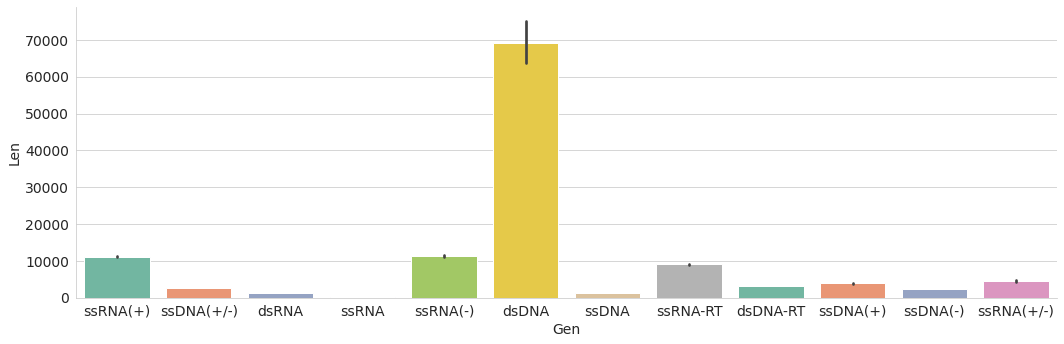

In [40]:
sns.catplot(x='Gen', y='Len', data=df, kind='bar', aspect=3, palette='Set2')

## Question #3: What is the maximum and minimum GC Ratio of sequence?

In [41]:
# GC Summary 
df.GC.describe()

count    43090.000000
mean        40.563391
std          7.713985
min         18.630000
25%         33.260000
50%         40.775000
75%         46.550000
max         75.590000
Name: GC, dtype: float64

## Question #4: Returns the maximum and minimum GC Ratio with their index.

In [42]:
# returns the maximum GC with index 
df.loc[df.GC.idxmax()]

Des    Macacine alphaherpesvirus 1 isolate 8100812, c...
Gen                                                dsDNA
Seq    GACCCGGCCCTCCCCCGGCGGCGCGCGCGCGAAAATAAACGCGGAA...
Len                                               157447
GC                                                 75.59
%N                                                     0
%A                                                 12.24
%T                                                 12.17
%G                                                 38.13
%C                                                 37.46
Name: KY628968.1, dtype: object

In [43]:
# returns the minimum GC with index 
df.loc[df.GC.idxmin()]

Des    UNVERIFIED: Rotavirus A strain RVA/Human-wt/US...
Gen                                                dsRNA
Seq    ATGGCGTACAGGAAACGTGGAGCGCGCCGTGAGGCAAACTTAAATA...
Len                                                 2652
GC                                                 18.63
%N                                                  1149
%A                                                 22.25
%T                                                  15.8
%G                                                  10.6
%C                                                  8.03
Name: MF184864.1, dtype: object

## Question #4: GC distributions

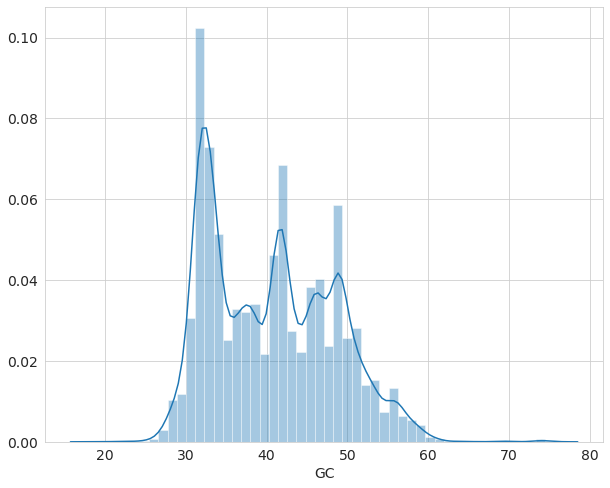

In [44]:
# GC distributions 
sns.distplot(df['GC']); 

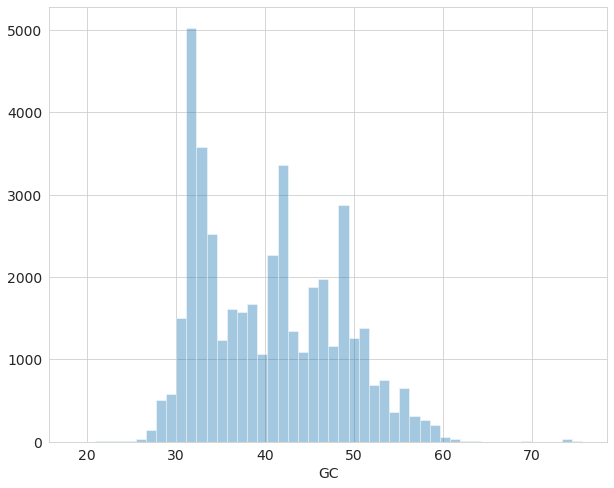

In [45]:
# GC distributions 
sns.distplot(df['GC'], kde=False); 

## Question #5: No. of Gen and bar plot

In [46]:
# Gen counts 
df['Gen'].value_counts() 

dsRNA         21167
ssRNA(+)       8712
ssDNA(+/-)     2950
ssRNA(-)       2604
ssRNA-RT       2446
dsDNA-RT       1941
dsDNA          1347
ssRNA           717
ssDNA(+)        530
ssDNA           268
ssRNA(+/-)      214
ssDNA(-)        194
Name: Gen, dtype: int64

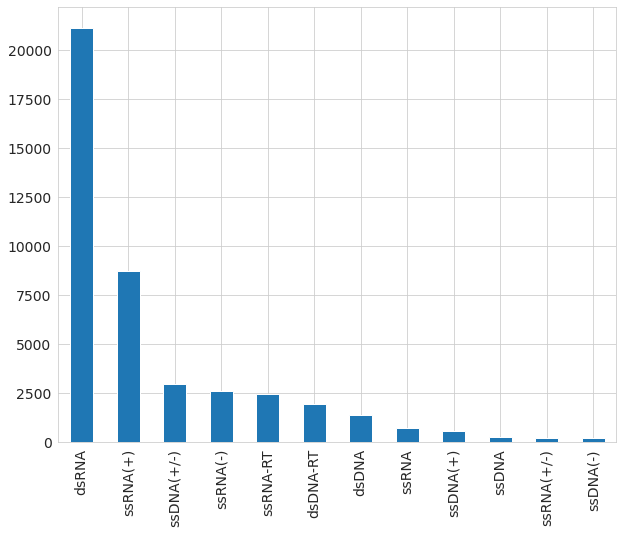

In [47]:
# bar chart 
df['Gen'].value_counts().plot(kind='bar');